In [7]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums
import numpy as np
import scipy.stats
import os
import fnmatch
import rear_analysis
import h5py
import statistics 
import datetime
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'
#processed= 'C:/Users/Fabian/Desktop/Rearing_analysis/processed'

# REFACTORED?: YES

### Loadign datasets

In [8]:
rat_ID = 'FS11'
FS11 = h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5' ,mode='r')

In [9]:
n1 = FS11.get('20211006-161633')
n1

<HDF5 group "/20211006-161633" (271 members)>

In [10]:
n1 = np.array(n1)
n1.shape


(271,)

In [12]:
FS11.close()

### plot trajectories 

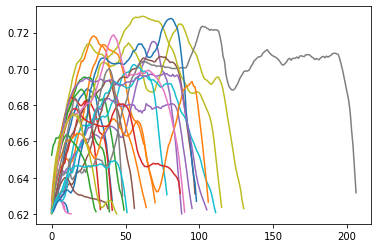

In [16]:
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as FS11:
    keys= (list(FS11.keys()))
    for key in keys: 
        ten = FS11.get(key+'/10')

        plt.plot(ten[:,2])

### Make histogram of all rears per animal  

### Find all keys and subkeys function 

In [18]:
def allkeys(obj):
    "Recursively find all keys in an h5py.Group."
    keys = (obj.name,)
    if isinstance(obj, h5py.Group):
        for key, value in obj.items():
            if isinstance(value, h5py.Group):
                keys = keys + allkeys(value)
            else:
                keys = keys + (value.name,)
    return keys

(array([5.386e+03, 1.670e+03, 4.740e+02, 1.780e+02, 7.000e+01, 2.800e+01,
        1.400e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([ 0.        ,  2.26299999,  4.52599998,  6.78899996,  9.05199995,
        11.31499994, 13.57799993, 15.84099991, 18.1039999 , 20.36699989,
        22.62999988]),
 <a list of 10 Patch objects>)

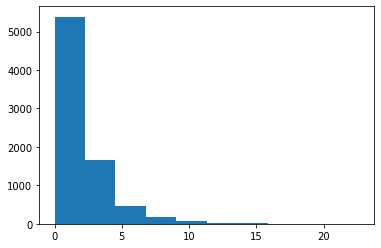

In [19]:
rat_ID= 'FS08'

with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    keys = allkeys(rat)
    lenght = []
    for key in keys: 
        #print(key)
        if len(key)>17:
            rear = rat.get(key)
            lenght.append((rear[-1][0]-rear[0][0]))
            #plt.plot(rear[:,2])
plt.hist(lenght,)      
    

In [20]:
len(keys)

7863

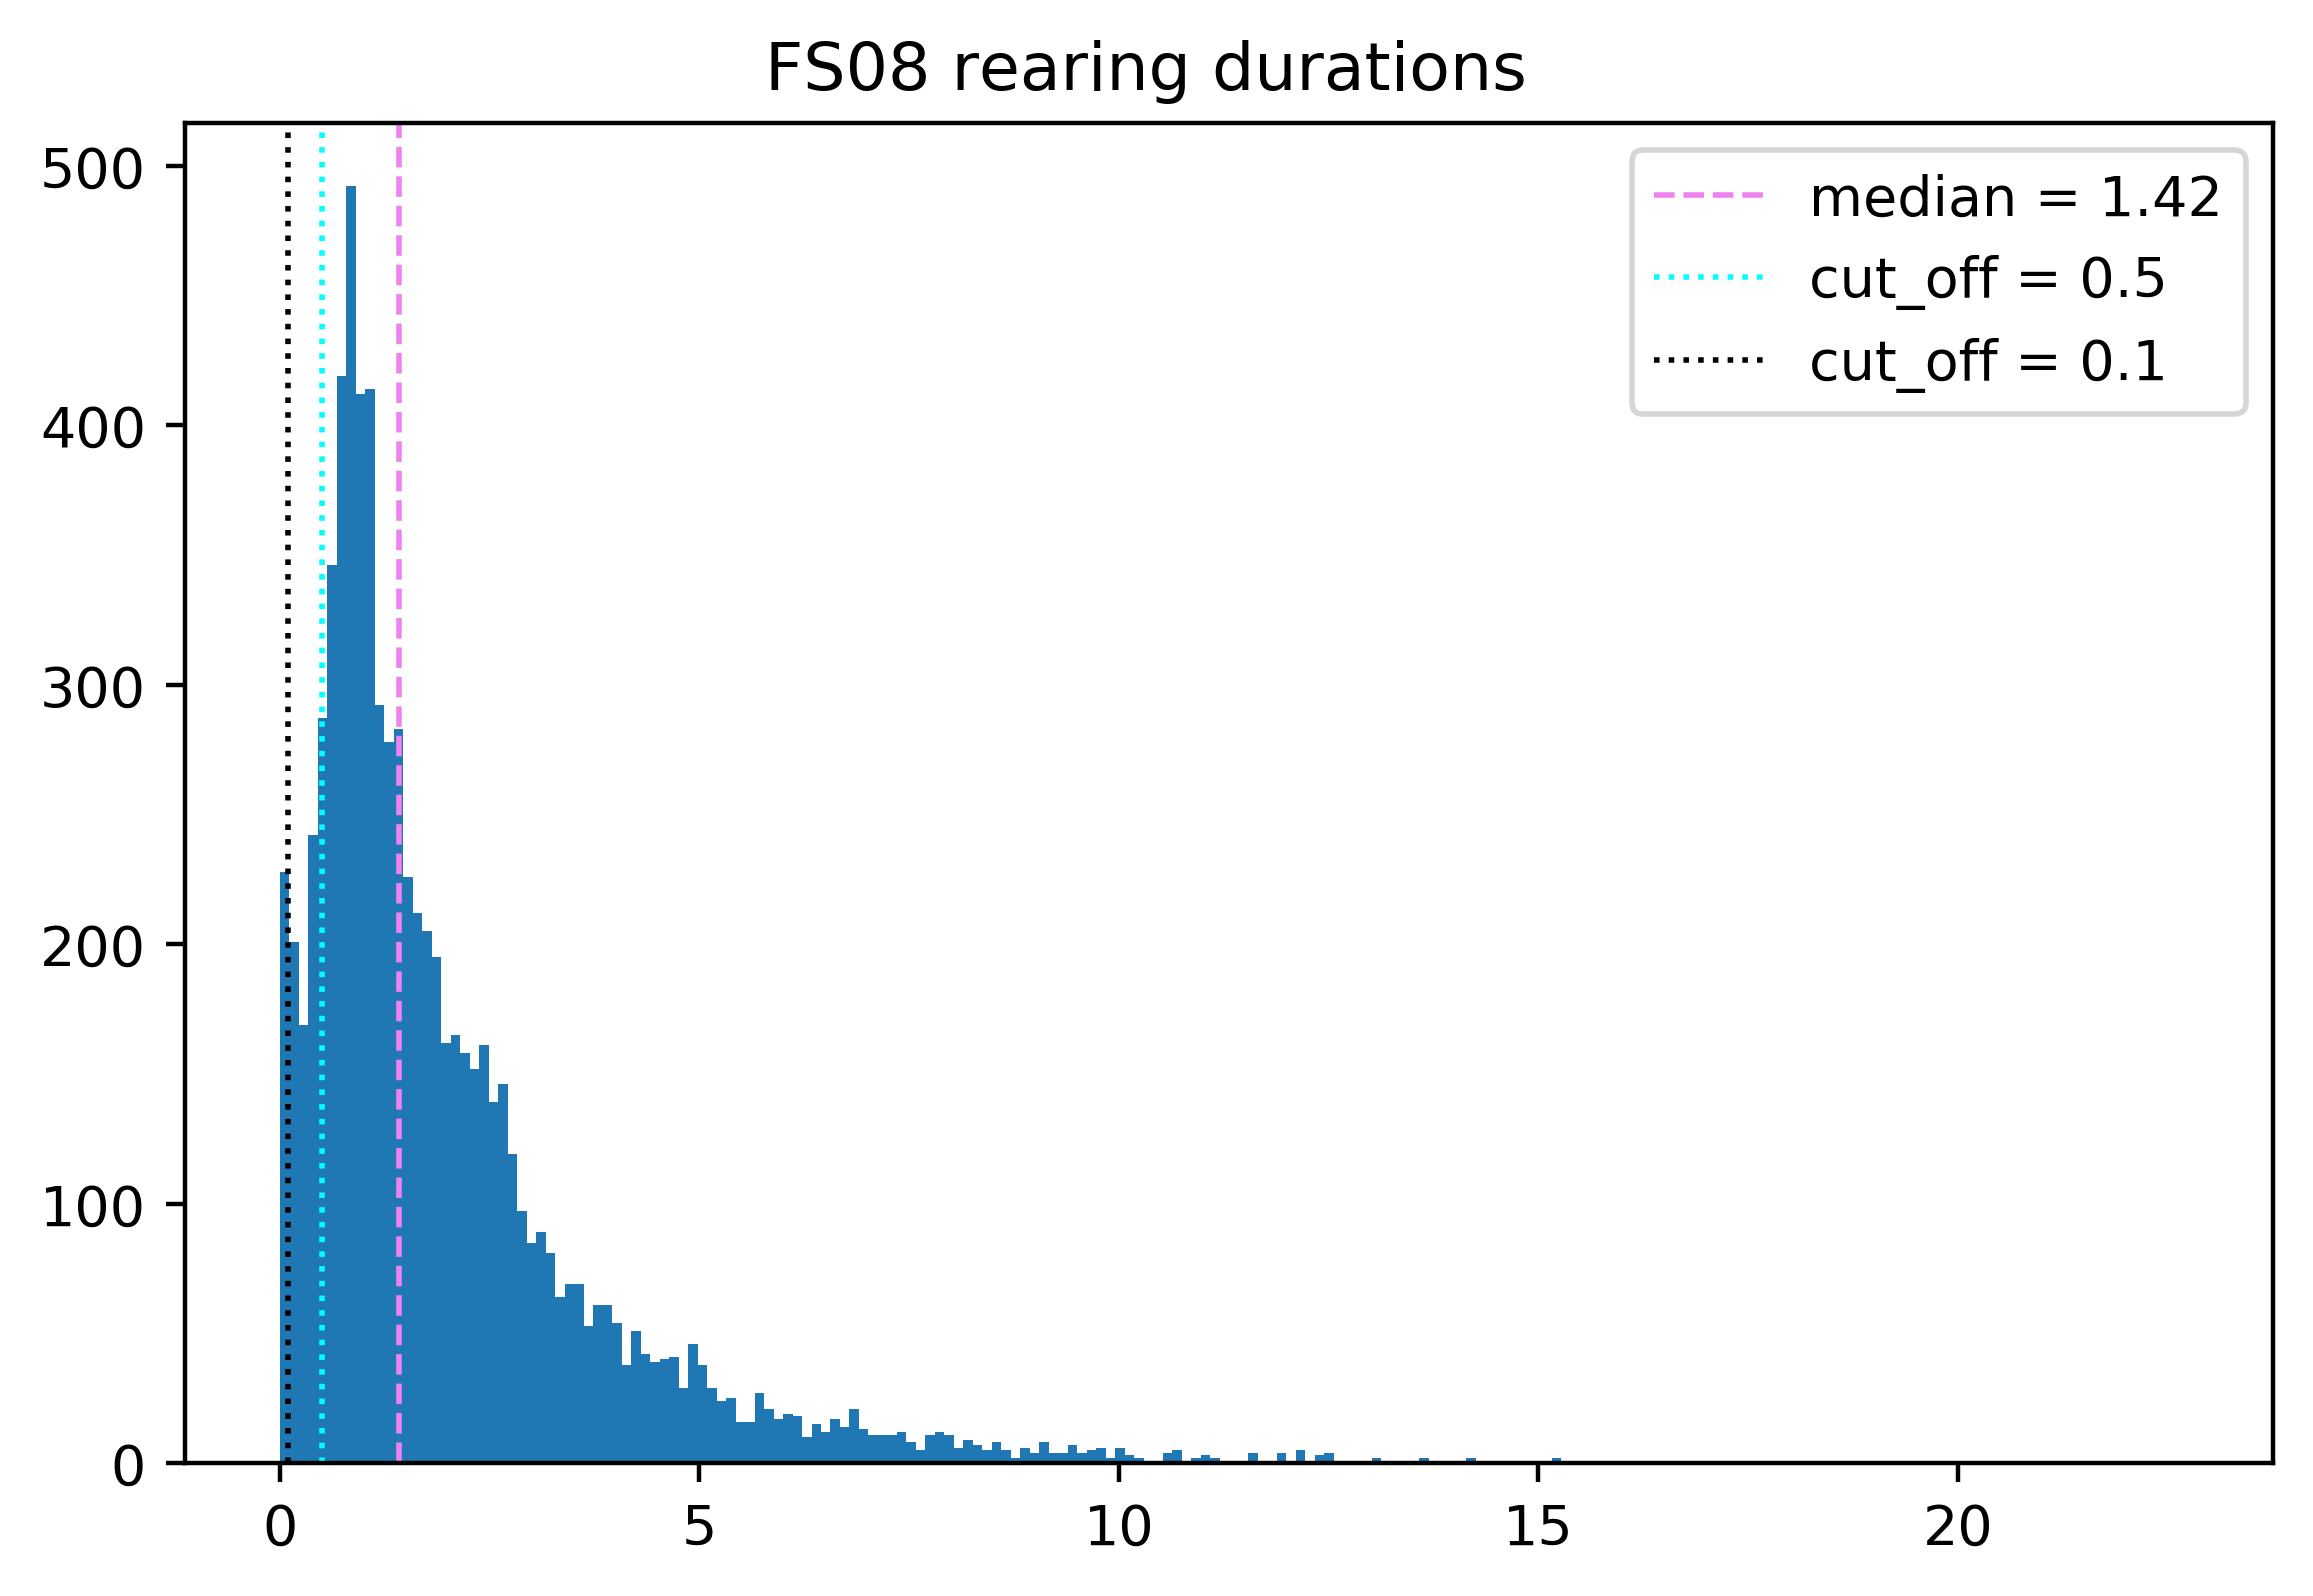

In [26]:

def make_simple_graphs (animal_ID,lenght,In_arena=False):
    if In_arena:
        border= '_in_arena'
    else:
        border=''
    
    plt.tight_layout
    median = statistics.median(lenght)
    fig, ax = plt.subplots(1,dpi=400,sharex=False)
    fig.suptitle(animal_ID +' rearing durations %s'%border,y=1)
    N, bins, patches=ax.hist(lenght,bins = 200)
    #ax.set_title('rear duration')
    fig.tight_layout(pad=1.5)
    plt.axvline(x=median , color='violet', linestyle='dashed', linewidth=1,label ="median = %.2f"%median)
    plt.axvline(x=.5 , color='cyan', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.5)
    plt.axvline(x=.1 , color='black', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.1)
    ax.legend(loc='upper right')
    plt.savefig('%srat_rearing_duration_in_arena%s%s.png'%(figures,border,animal_ID), dpi = 100)
    
make_simple_graphs('FS08' ,lenght) 

### Now only duration of rears inside of arena

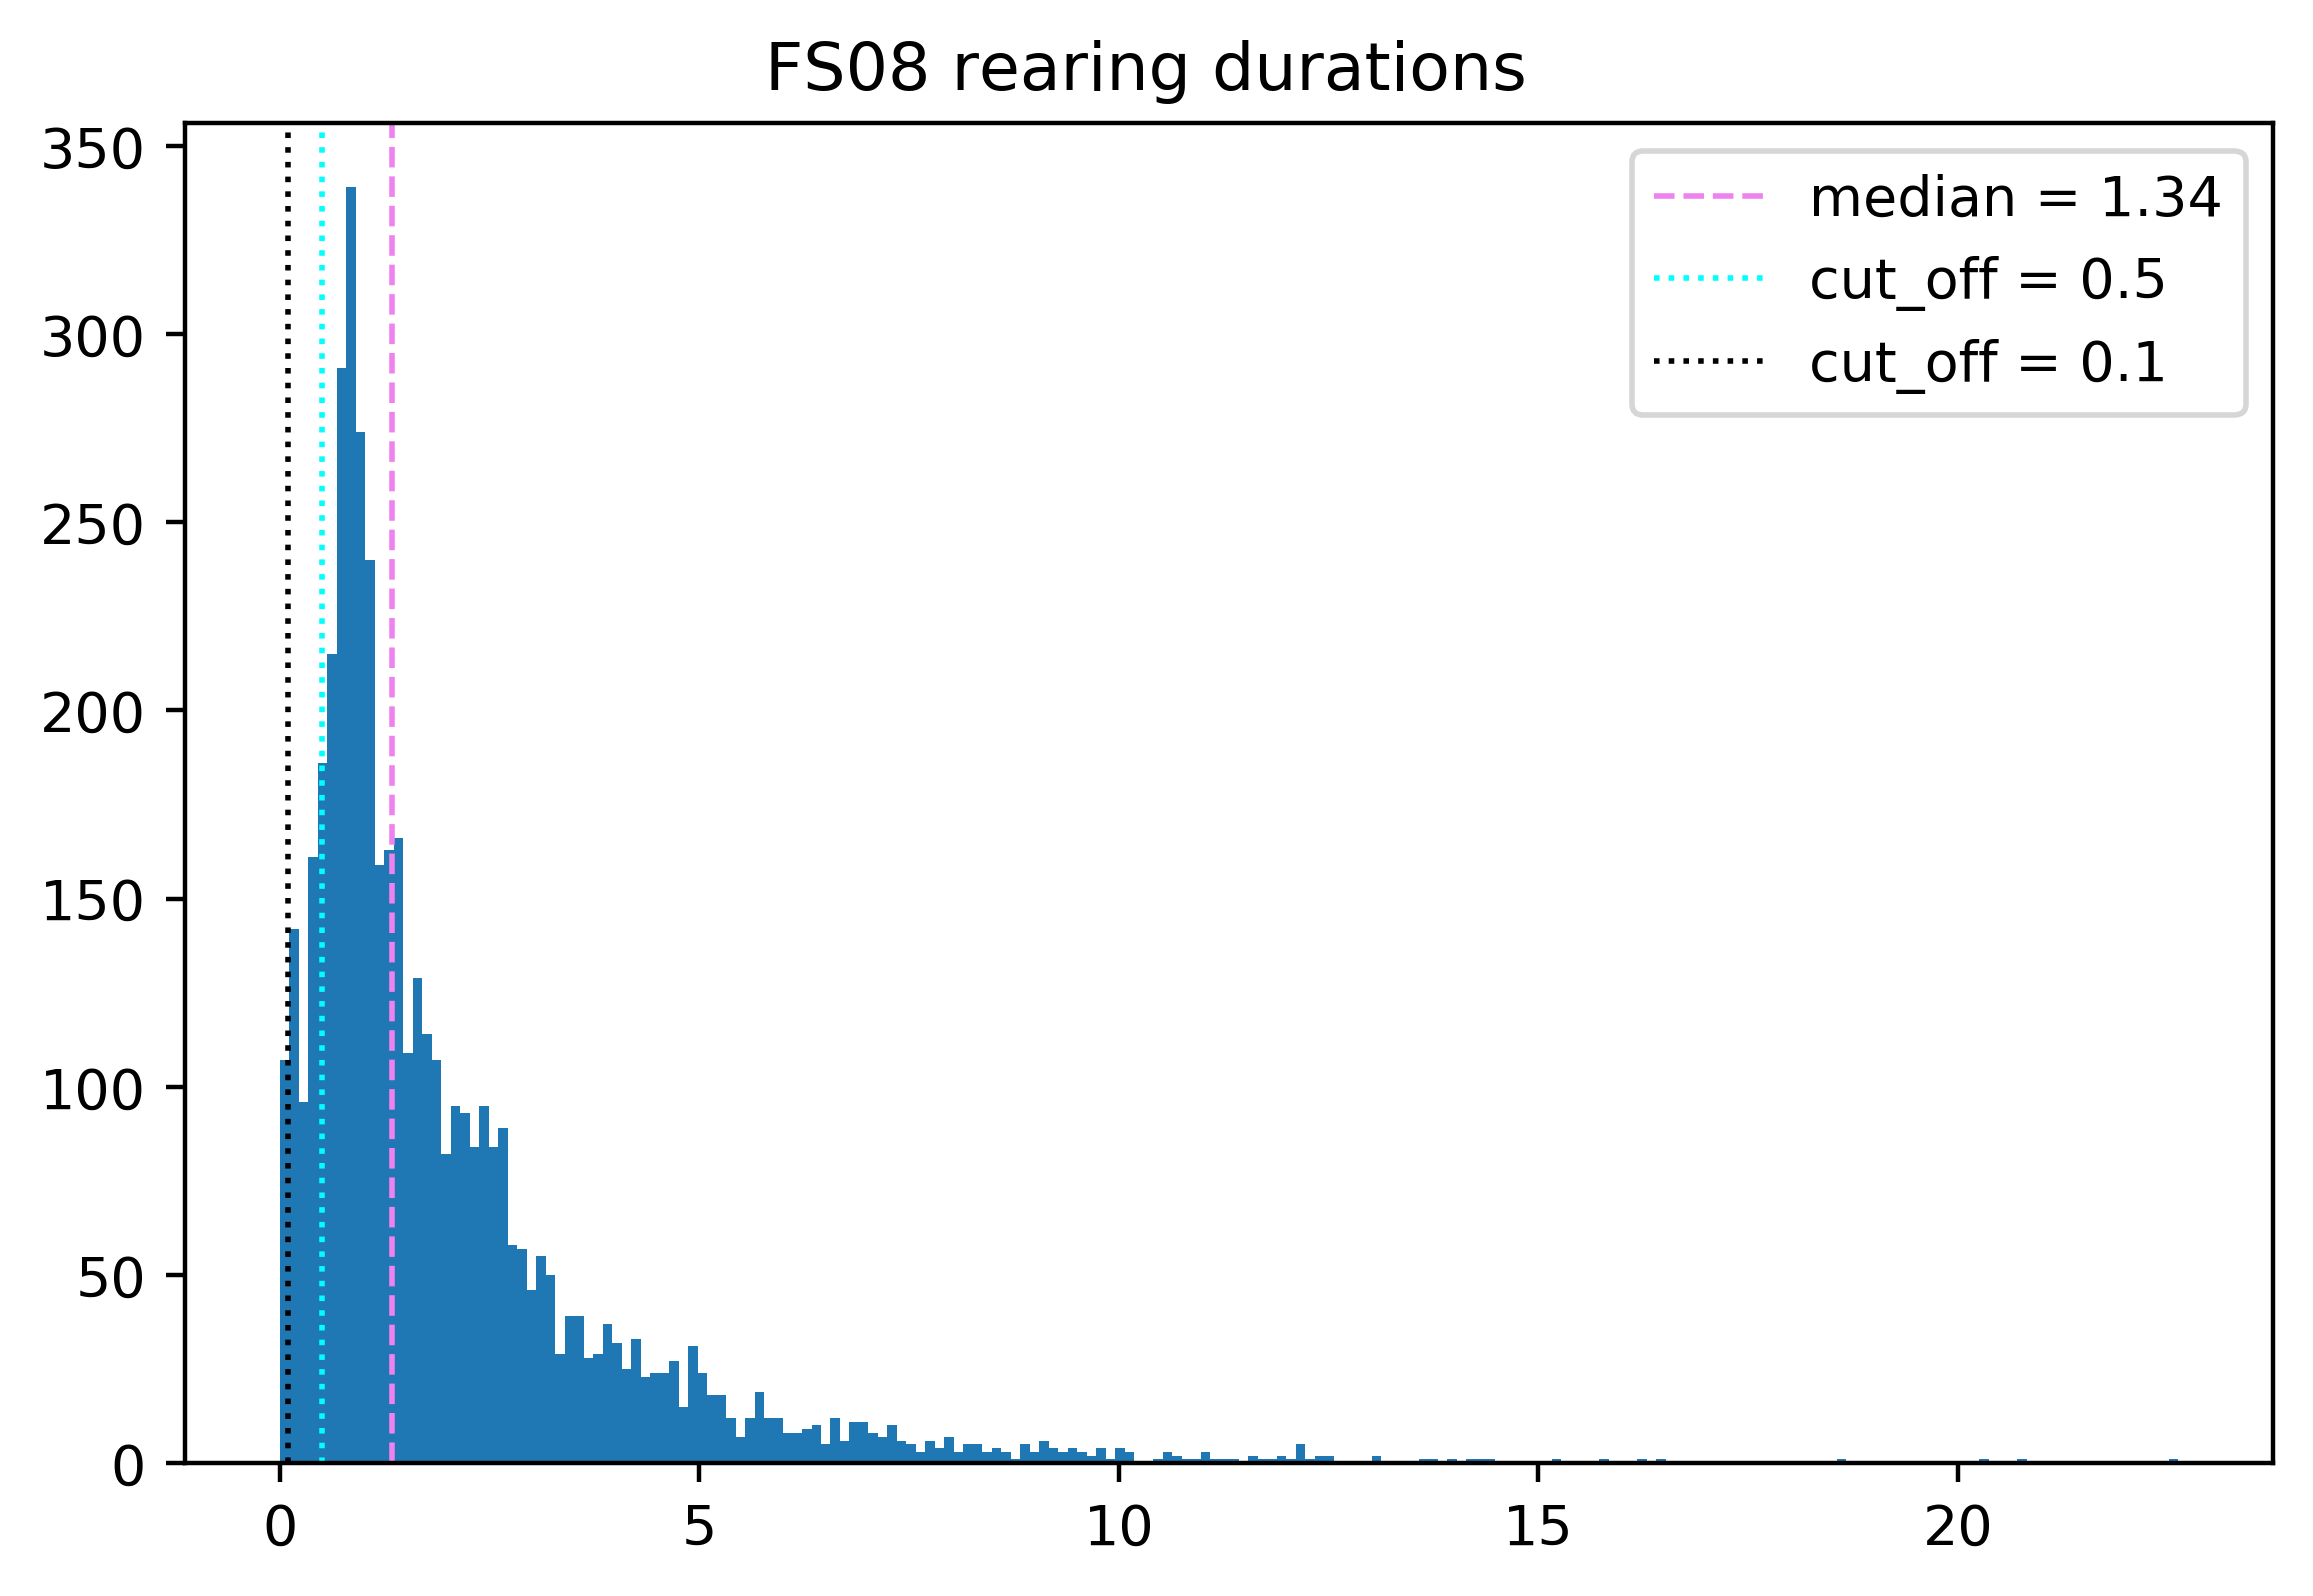

In [27]:
cut=0
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
rat_ID= 'FS08'
count=0
lenght= []
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    days= (list(rat.keys()))
    keys = allkeys(rat)
    for key in keys: 
        for day in days:
            if day in key:
                #print(key)
                if len(key)>17:
                    rear = rat.get(key)
                    rear=pd.DataFrame(rear)
                    #print(rear[:,3])
                    positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                    print
                    if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                    count] < (Y_cut_max - cut):
                        #print(positions[0][0])
                        #print(positions[0].iloc[-1])
                        lenght.append((positions[0].iloc[-1]-positions[0][0]))
                        
make_simple_graphs('FS08' ,lenght,In_arena=False) 

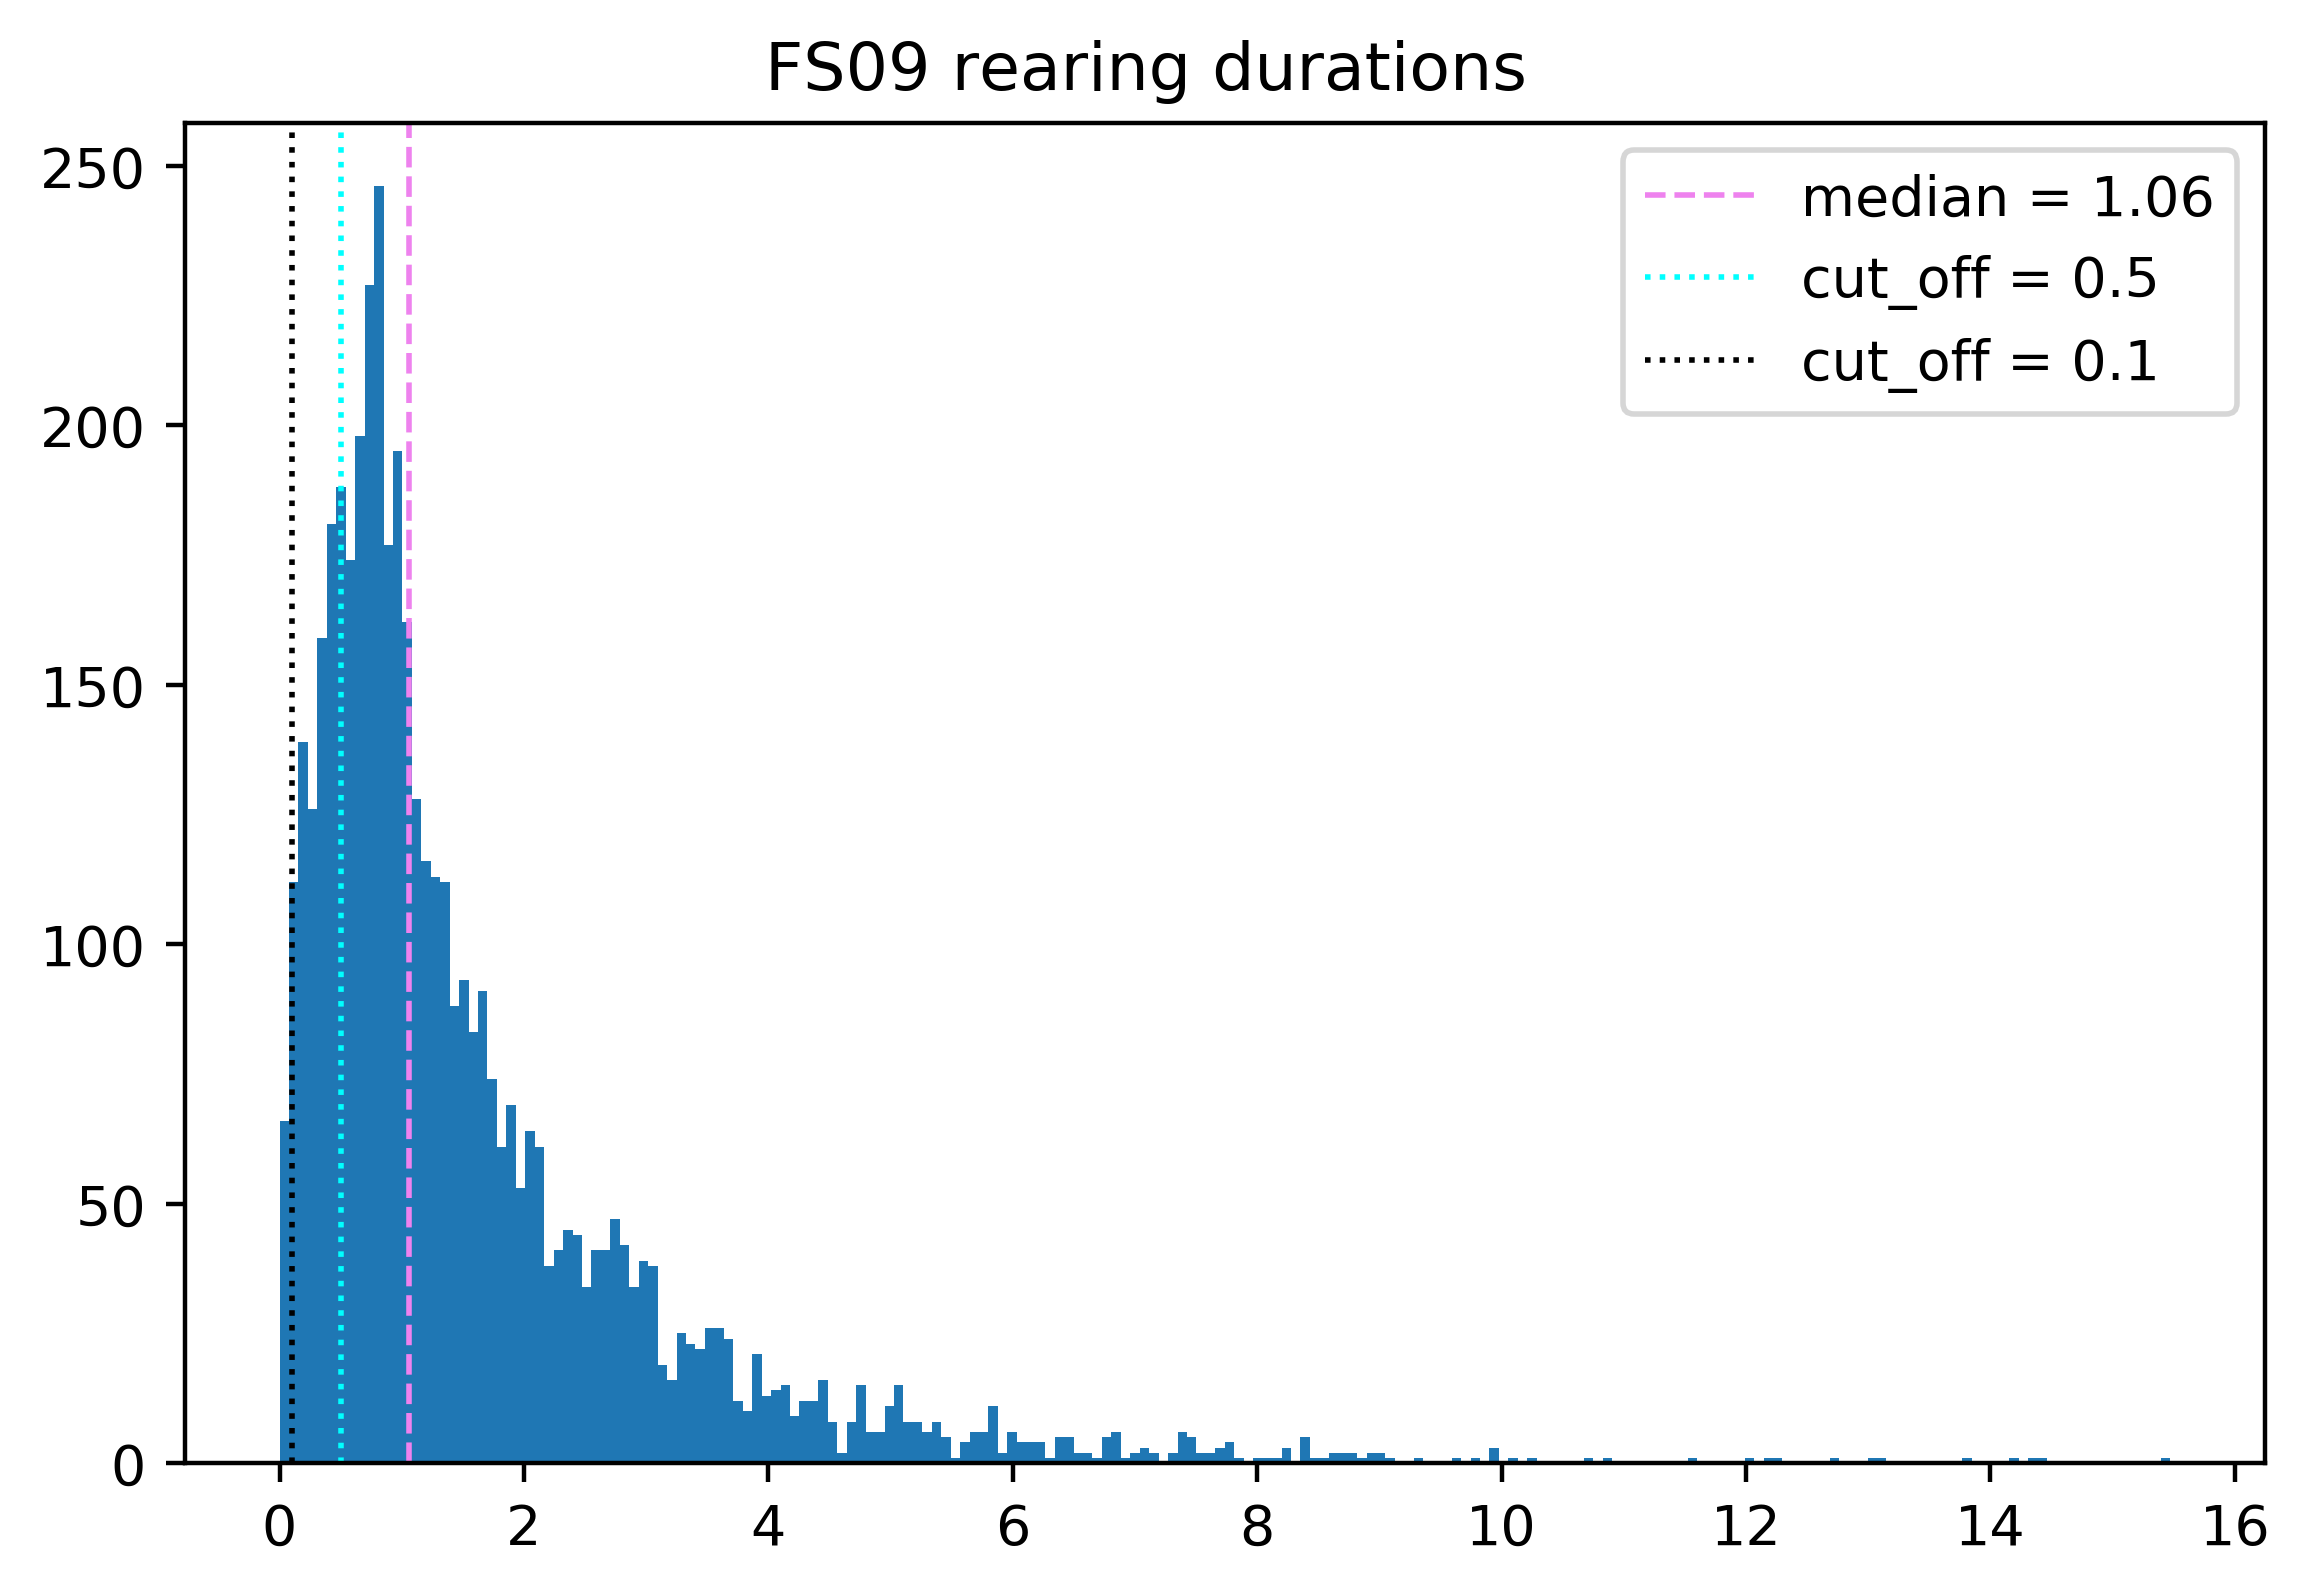

In [28]:
cut=0
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
rat_ID= 'FS09'
count=0
lenght= []
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    days= (list(rat.keys()))
    keys = allkeys(rat)
    for key in keys: 
        for day in days:
            if day in key:
                #print(key)
                if len(key)>17:
                    rear = rat.get(key)
                    rear=pd.DataFrame(rear)
                    #print(rear[:,3])
                    positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                    print
                    if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                    count] < (Y_cut_max - cut):
                        #print(positions[0][0])
                        #print(positions[0].iloc[-1])
                        lenght.append((positions[0].iloc[-1]-positions[0][0]))
                        
make_simple_graphs('FS09' ,lenght,In_arena=False)  

### Need to make list of all tags only in sublists

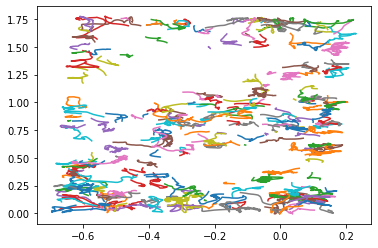

In [31]:
rat_ID= 'FS08'
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    days= (list(rat.keys()))
    select_days= days[0:1]
    keys = allkeys(rat)
    for key in keys: 
        for day in select_days:
            if day in key:
                #print(key)
                if len(key)>17:
                    rear = rat.get(key)
                    plt.plot(rear[:,1],rear[:,3])

In [34]:
#how to acces each rear
for key in keys: 
    for day in select_days:
        if day in key:
            print(key)

/20211006-141250
/20211006-141250/0
/20211006-141250/1
/20211006-141250/10
/20211006-141250/100
/20211006-141250/101
/20211006-141250/102
/20211006-141250/103
/20211006-141250/104
/20211006-141250/105
/20211006-141250/106
/20211006-141250/107
/20211006-141250/108
/20211006-141250/109
/20211006-141250/11
/20211006-141250/110
/20211006-141250/111
/20211006-141250/112
/20211006-141250/113
/20211006-141250/114
/20211006-141250/115
/20211006-141250/116
/20211006-141250/117
/20211006-141250/118
/20211006-141250/119
/20211006-141250/12
/20211006-141250/120
/20211006-141250/121
/20211006-141250/122
/20211006-141250/123
/20211006-141250/124
/20211006-141250/125
/20211006-141250/126
/20211006-141250/127
/20211006-141250/128
/20211006-141250/129
/20211006-141250/13
/20211006-141250/130
/20211006-141250/131
/20211006-141250/132
/20211006-141250/133
/20211006-141250/134
/20211006-141250/135
/20211006-141250/136
/20211006-141250/137
/20211006-141250/138
/20211006-141250/139
/20211006-141250/14
/2021

### TODO - DONE : Print only rears which are inside of the arena and in one day 

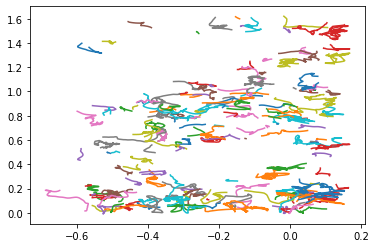

In [35]:
cut=0
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
rat_ID= 'FS08'
count=0
with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    days= (list(rat.keys()))
    keys = allkeys(rat)
    for key in keys: 
        for day in select_days:
            if day in key:
                #print(key)
                if len(key)>17:
                    rear = rat.get(key)
                    rear=pd.DataFrame(rear)
                    #print(rear[:,3])
                    positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                    print
                    if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                    count] < (Y_cut_max - cut):
                        plt.plot(positions[1],positions[3])

### Connect indexes of rears with rear to know where was beacon 

In [37]:
rat_ID="FS08"
FS08_one_day= rear_analysis.day_cutter('FS08',In_arena=False, days=(1,2))
Friday = FS08_one_day.reset_index()


In [38]:

def distance(x1,y1,x2,y2):
    dist = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist

In [39]:
len(Friday)

260

##### Try to print only rears within 20cm of the center of beacon

#### Problem SOLVED - lenght of selected days does not match the lenght of the rear_traj detected - could be that the cutter is off, but the times match, or that the csv is generated for only rears inside of arena?  - cutter funciton was cutting for only insideof arena. 

### FOR ONE DAY::

1.3761607052432498
1.3761607052432498
0.30909877497791977
0.5938313566348701
0.5345542480083461
0.5586013317510262
0.9376204340274901
0.6505430691806623
0.24425217391436702
0.3915743756261126
0.613151814714428
0.25607719092362585
0.3164558804058512
0.5851156218748806
0.385947784635961
0.5970052870794078
0.7773849170213643
0.7773598381870785
0.8205162352679152
0.22251177101938066
0.10123801429297591
0.2787410989517482
0.5913415334898331
0.5836160948135035
1.4443435718931166
0.9571563891948807
0.9083375607402108
0.901107589130981
1.2871505261028637
1.4545501921959552
1.137964658132344
0.9989440444220811
1.0681997305567383
0.7863471545631522
0.5747795560630804
0.31221355131118544
0.2891418263986222
0.24255658360361249
0.40651868021756904
0.39405192445263465
0.7538034755429553
1.0126019226573486
0.76863803312523
0.8551381838050641
0.4919957463406813
0.5644040542805423
0.1663651307833744
0.1121763641268655
0.20741323882552548
0.2700402484020274
0.5208214958431304
0.4917947627503297
0.539650

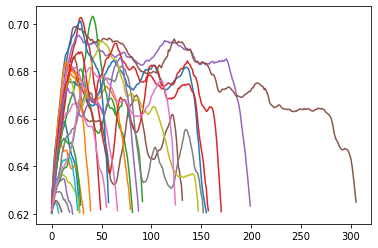

In [41]:
FS08=pd.read_excel(processed +'FS08_rears_all.xlsx', index_col=0)

with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
    days= (list(rat.keys()))
    select_days= days[1:2]
    keys = allkeys(rat)
    index=0
    rear_traj=[]
    rear_traj_out=[]
    lenght_in=[]
    lenght_out=[]
    
    for key in keys: 
        for day in select_days:
            if day in key:
                 if len(key)>17:
                    #rear_traj.append(key)                                 
                    #print(datetime.datetime.fromtimestamp(Friday.iloc[index]['Time']))
                    rear = rat.get(key)
                    rear=pd.DataFrame(rear)
                    #print(datetime.datetime.fromtimestamp(rear.iloc[0][0]))
                    time= rear.iloc[0][0]
                    #print(time)
                    k =Friday[Friday['Time'].apply(lambda x: x==time)]
                    #k = Friday.Time.isin(time)
                    #print(k)
                    dist = distance(k.iloc[0][2],k.iloc[0][3],k.iloc[0][5],k.iloc[0][6])
                    print(dist)
                    #print(k.iloc[0][1])
                    #print(datetime.datetime.fromtimestamp(k.iloc[0][1]))
                    if dist <.20:
                        index+=1
                        positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                        if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                        count] < (Y_cut_max - cut):
                            rear_traj.append(positions[2])
                            plt.plot(positions[2])
                        lenght_in.append((positions[0].iloc[-1]-positions[0][0]))
                        
                    else:
                        if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                        count] < (Y_cut_max - cut):
                            rear_traj_out.append(positions[2])
                        lenght_out.append((positions[0].iloc[-1]-positions[0][0]))
                            
    print(index)


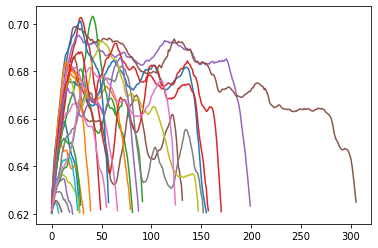

In [327]:
#plt.plot(rear_traj)
for rear in rear_traj:
    plt.plot(rear)

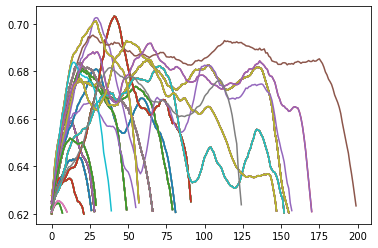

In [42]:
for rear in rear_traj_out:
    plt.plot(rear)

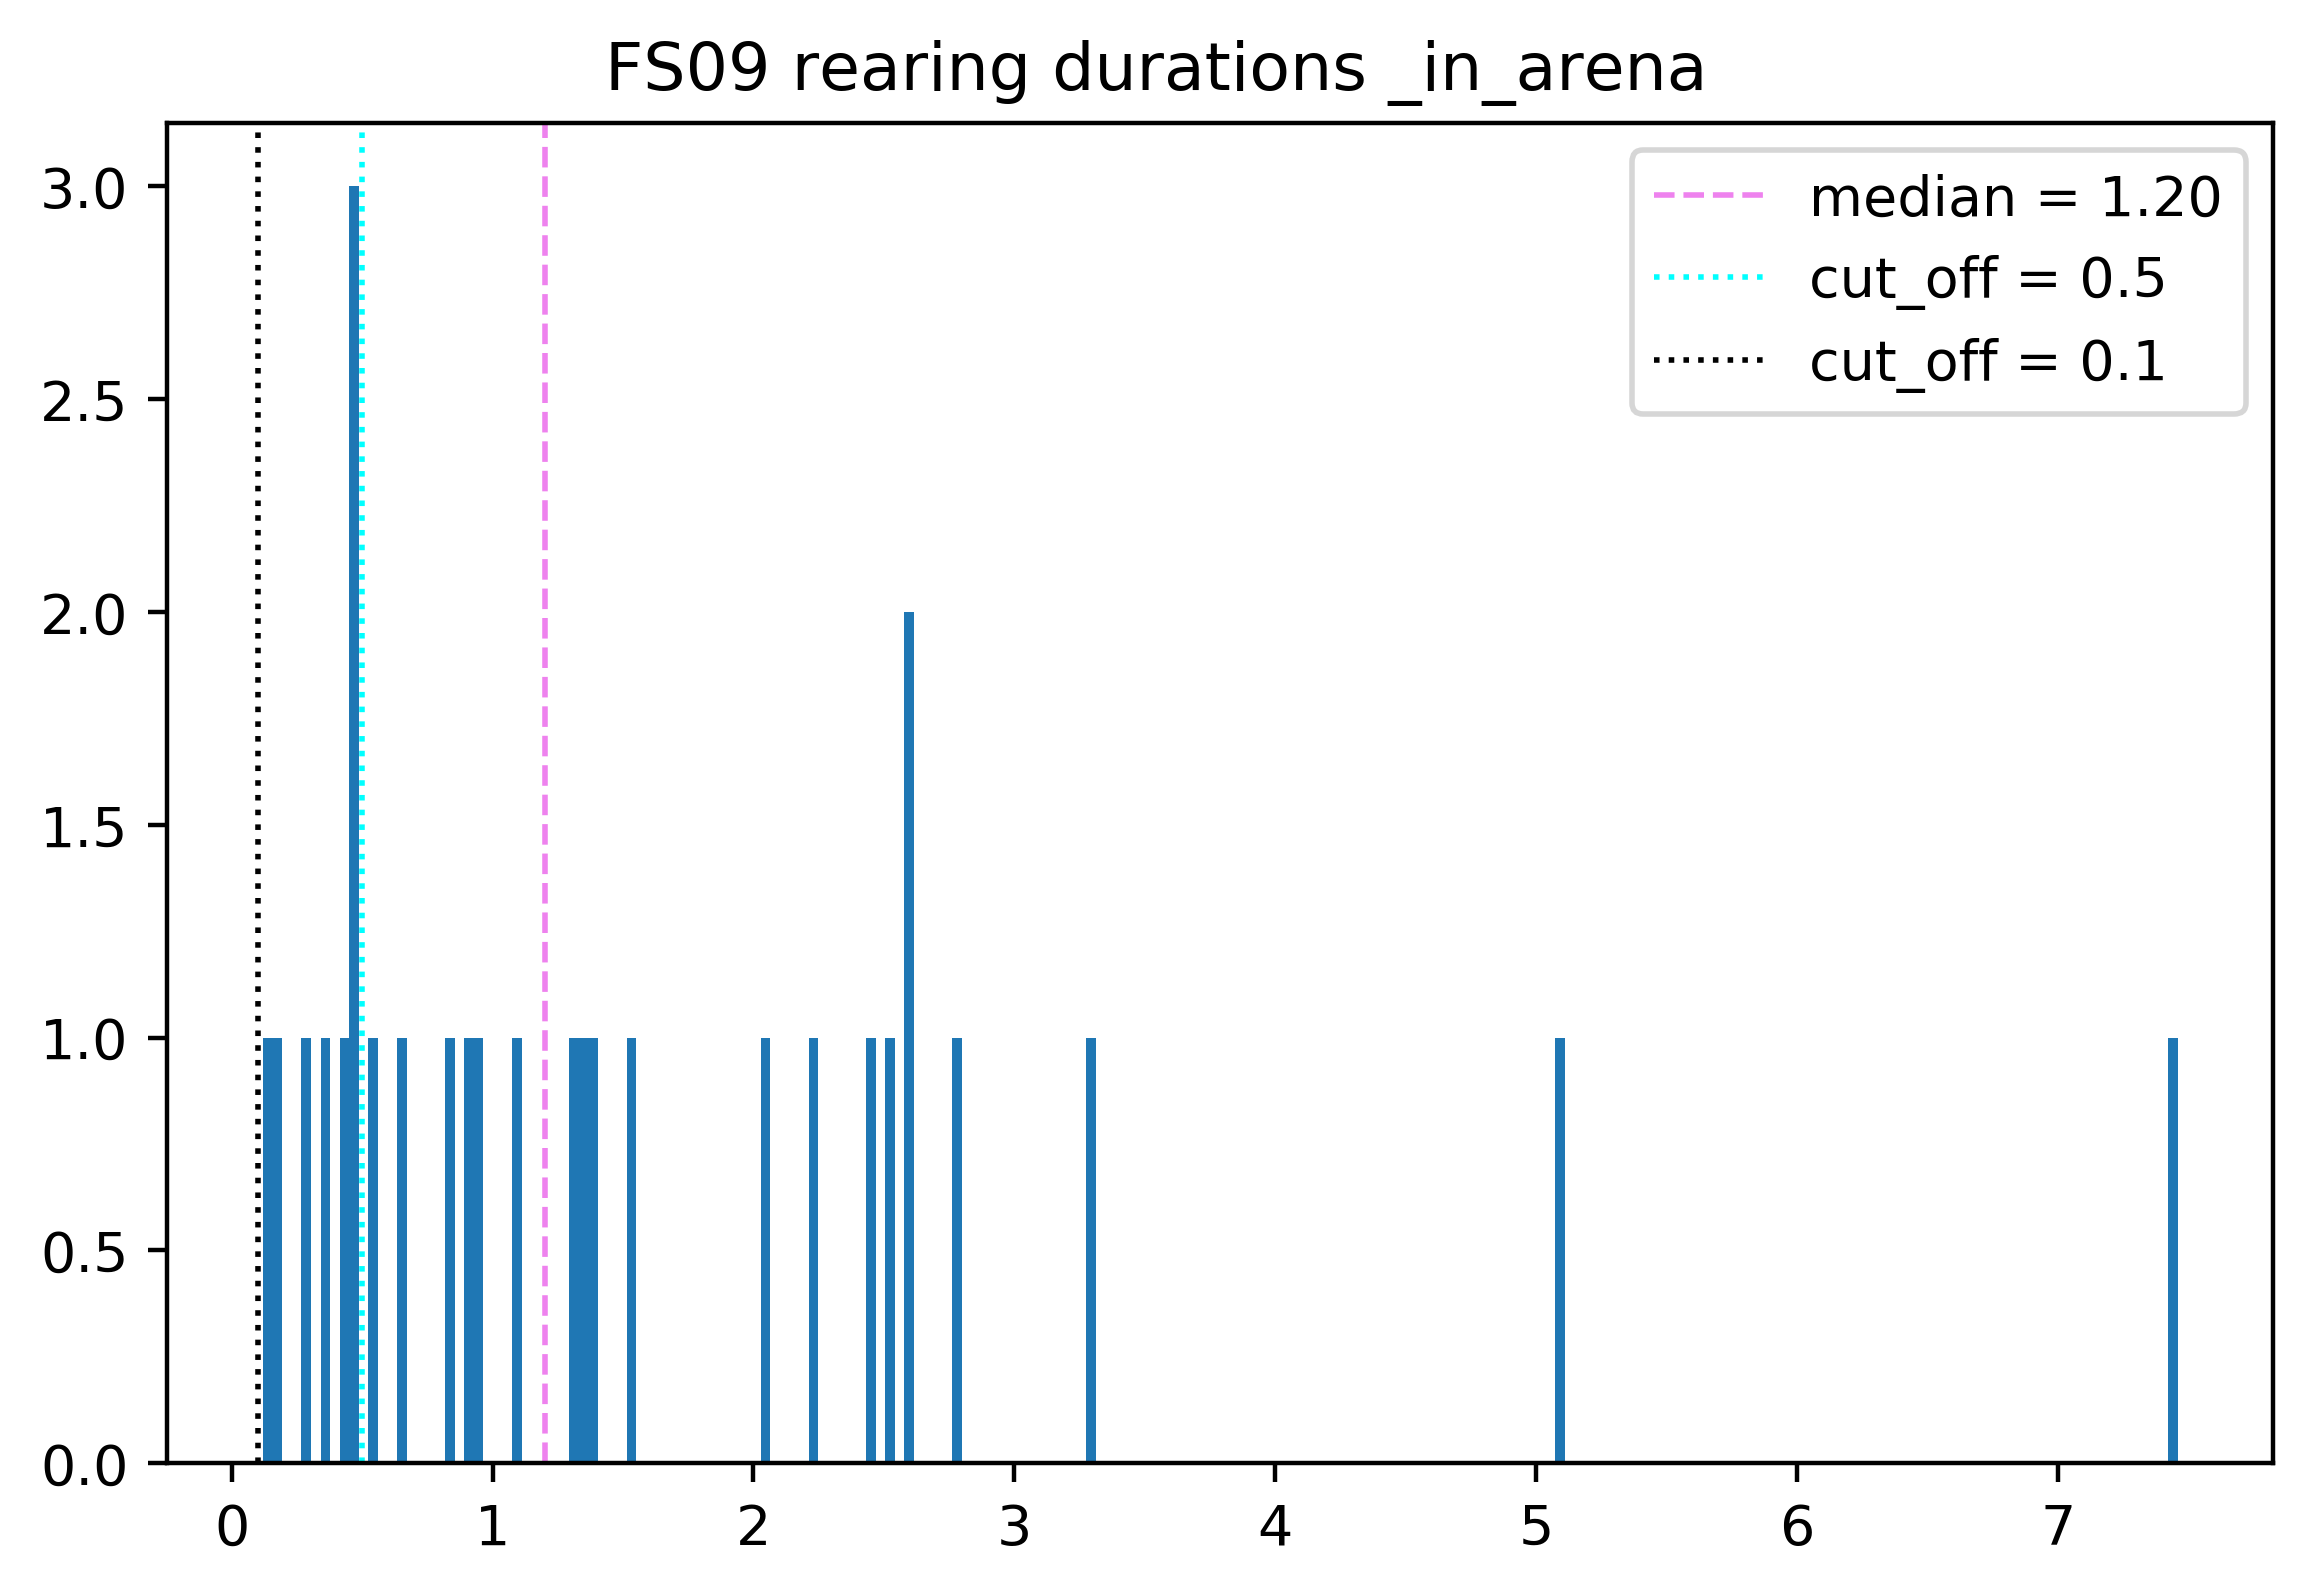

In [43]:
make_simple_graphs('FS09' ,lenght_in,In_arena=True) 

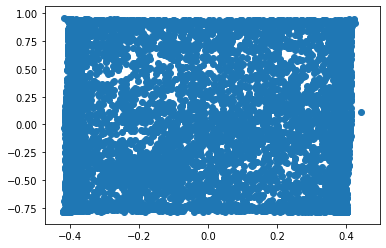

In [289]:
plt.scatter(FS08["RatX"],FS08["RatY"])

### FUNCTION FOR WHATEVER DAY - ### Plot only rears within vicinity of the beacon  VS. further away
    Here we take the days to index into and extracj trajectoris of rears claculatte median time fir thise ariund the beacon beacon or not but still within inner boudnaries of arena. 


In [44]:
#FS08=pd.read_excel(processed +'FS08_rears_all.xlsx', index_col=0)

def Get_rear_dur_around_beacon_and_not (rat_ID,day_beg,day_end,distance_from_beacon=.2):
    
    with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
        Friday = rear_analysis.day_cutter(rat_ID,In_arena=False, days=(day_beg,day_end))
        meta_rears = Friday.reset_index()
        days= (list(rat.keys()))
        select_days= days[day_beg:day_end]
        keys = allkeys(rat)
        index=0
        rear_traj=[]
        rear_traj_out=[]
        lenght_in=[]
        lenght_out=[]
        for key in keys: 
            for day in select_days:
                if day in key:
                     if len(key)>17:
                        rear = rat.get(key)
                        rear=pd.DataFrame(rear)
                        time= rear.iloc[0][0]
                        k =meta_rears[meta_rears['Time'].apply(lambda x: x==time)]
                        dist = distance(k.iloc[0][2],k.iloc[0][3],k.iloc[0][5],k.iloc[0][6])
                        #print(dist)
                        if dist <distance_from_beacon:
                            index+=1
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut):
                                rear_traj.append(positions[2])
                                #plt.plot(positions[2])
                                lenght_in.append((positions[0].iloc[-1]-positions[0][0]))

                        else:
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut):
                                rear_traj_out.append(positions[2])
                                lenght_out.append((positions[0].iloc[-1]-positions[0][0]))

        print("collected %s rears"%index)
    return(lenght_in,lenght_out,rear_traj,rear_traj_out)
lenght_in,lenght_out,rear_traj,rear_traj_out=Get_rear_dur_around_beacon_and_not(rat_ID='FS11',day_beg=0,day_end=7,distance_from_beacon=.2)

collected 545 rears


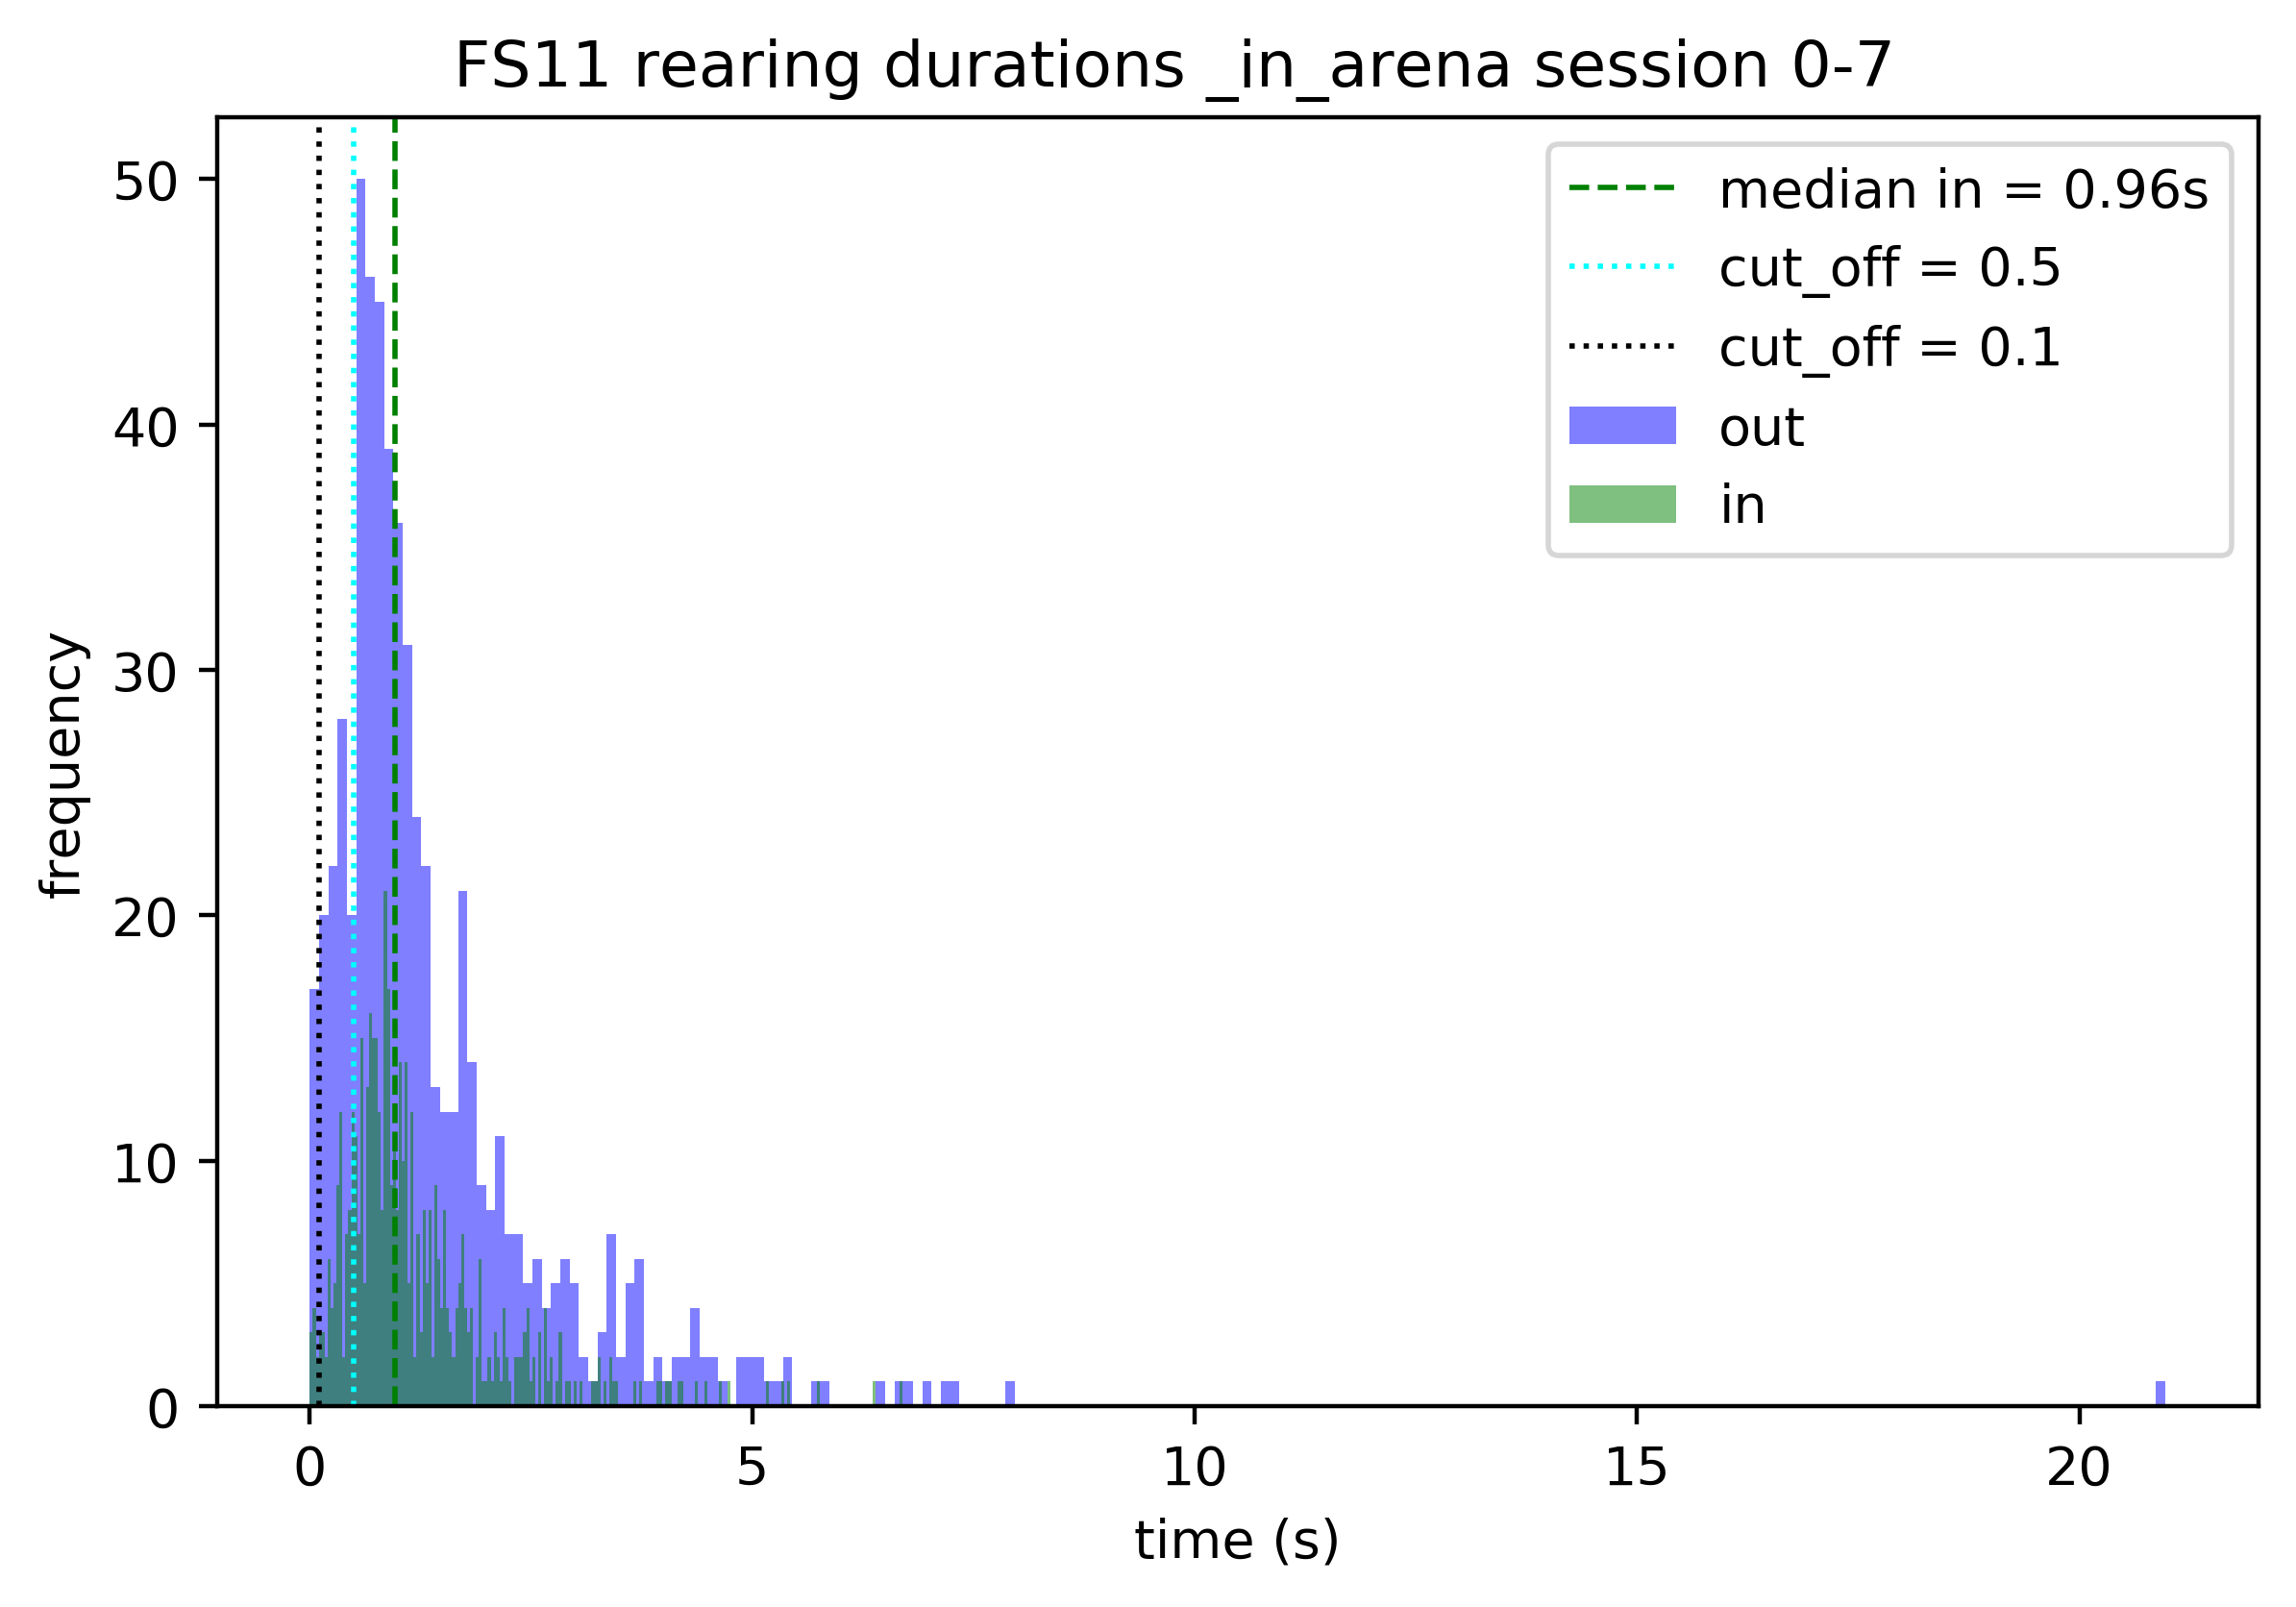

In [46]:
rat_ID='FS11'
day_beg=0
day_end=7
def make_simple_graphs_beacon (animal_ID,lenght,lenght_out,day_beg,day_end,In_arena=False):
    if In_arena:
        border= '_in_arena'
    else:
        border=''
    plt.tight_layout
    median = statistics.median(lenght_in)
    fig, ax = plt.subplots(1,dpi=400,sharex=False)
    fig.suptitle(animal_ID +' rearing durations %s session %s-%s '%(border,day_beg,day_end),y=1)
    N, bins, patches=ax.hist(lenght_out,bins = 200,alpha=.5,color='blue',label = "out")
    N, bins, patches=ax.hist(lenght,bins = 200,alpha=.5,color='g',label = "in")
    #ax.set_title('rear duration')
    fig.tight_layout(pad=1.5)
    plt.axvline(x=median , color='g', linestyle='dashed', linewidth=1,label ="median in = %.2fs"%median)
    plt.axvline(x=.5 , color='cyan', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.5)
    plt.axvline(x=.1 , color='black', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.1)
    plt.xlabel('time (s)')
    plt.ylabel('frequency')
    ax.legend(loc='upper right')
    plt.savefig('%srat_rearing_duration_around_beacon%s_session_%s_%s_%s.png'%(figures,border,day_beg,day_end,animal_ID), dpi = 100)
    
make_simple_graphs_beacon(rat_ID ,lenght_in,lenght_out,day_beg,day_end,In_arena=True) 

### Plot rears which are visible and which are invisible

In [47]:
#FS08=pd.read_excel(processed +'FS08_rears_all.xlsx', index_col=0)

def Get_rear_dur_visible_and_not (rat_ID,day_beg,day_end,distance_from_beacon=.2):
    with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
        Friday = rear_analysis.day_cutter(rat_ID,In_arena=False, days=(day_beg,day_end))
        meta_rears = Friday.reset_index()
        days= (list(rat.keys()))
        select_days= days[day_beg:day_end]
        keys = allkeys(rat)
        index=0
        rear_traj=[]
        rear_traj_out=[]
        lenght_in=[]
        lenght_out=[]
        for key in keys: 
            for day in select_days:
                if day in key:
                     if len(key)>17:
                        rear = rat.get(key)
                        rear=pd.DataFrame(rear)
                        time= rear.iloc[0][0]
                        k =meta_rears[meta_rears['Time'].apply(lambda x: x==time)]
                        dist = distance(k.iloc[0][2],k.iloc[0][3],k.iloc[0][5],k.iloc[0][6])
                        #print(dist)
                        #print(k.iloc[0][7])
                        if k.iloc[0][7]==0 :
                            index+=1
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut) :
                                rear_traj.append(positions[2])
                                #plt.plot(positions[2])
                                lenght_in.append((positions[0].iloc[-1]-positions[0][0]))

                        else:
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut):
                                rear_traj_out.append(positions[2])
                                lenght_out.append((positions[0].iloc[-1]-positions[0][0]))

        print("collected %s rears"%index)
    return(lenght_in,lenght_out,rear_traj,rear_traj_out)
lenght_in,lenght_out,rear_traj,rear_traj_out=Get_rear_dur_visible_and_not(rat_ID='FS08',day_beg=16,day_end=21,distance_from_beacon=.2)

collected 803 rears


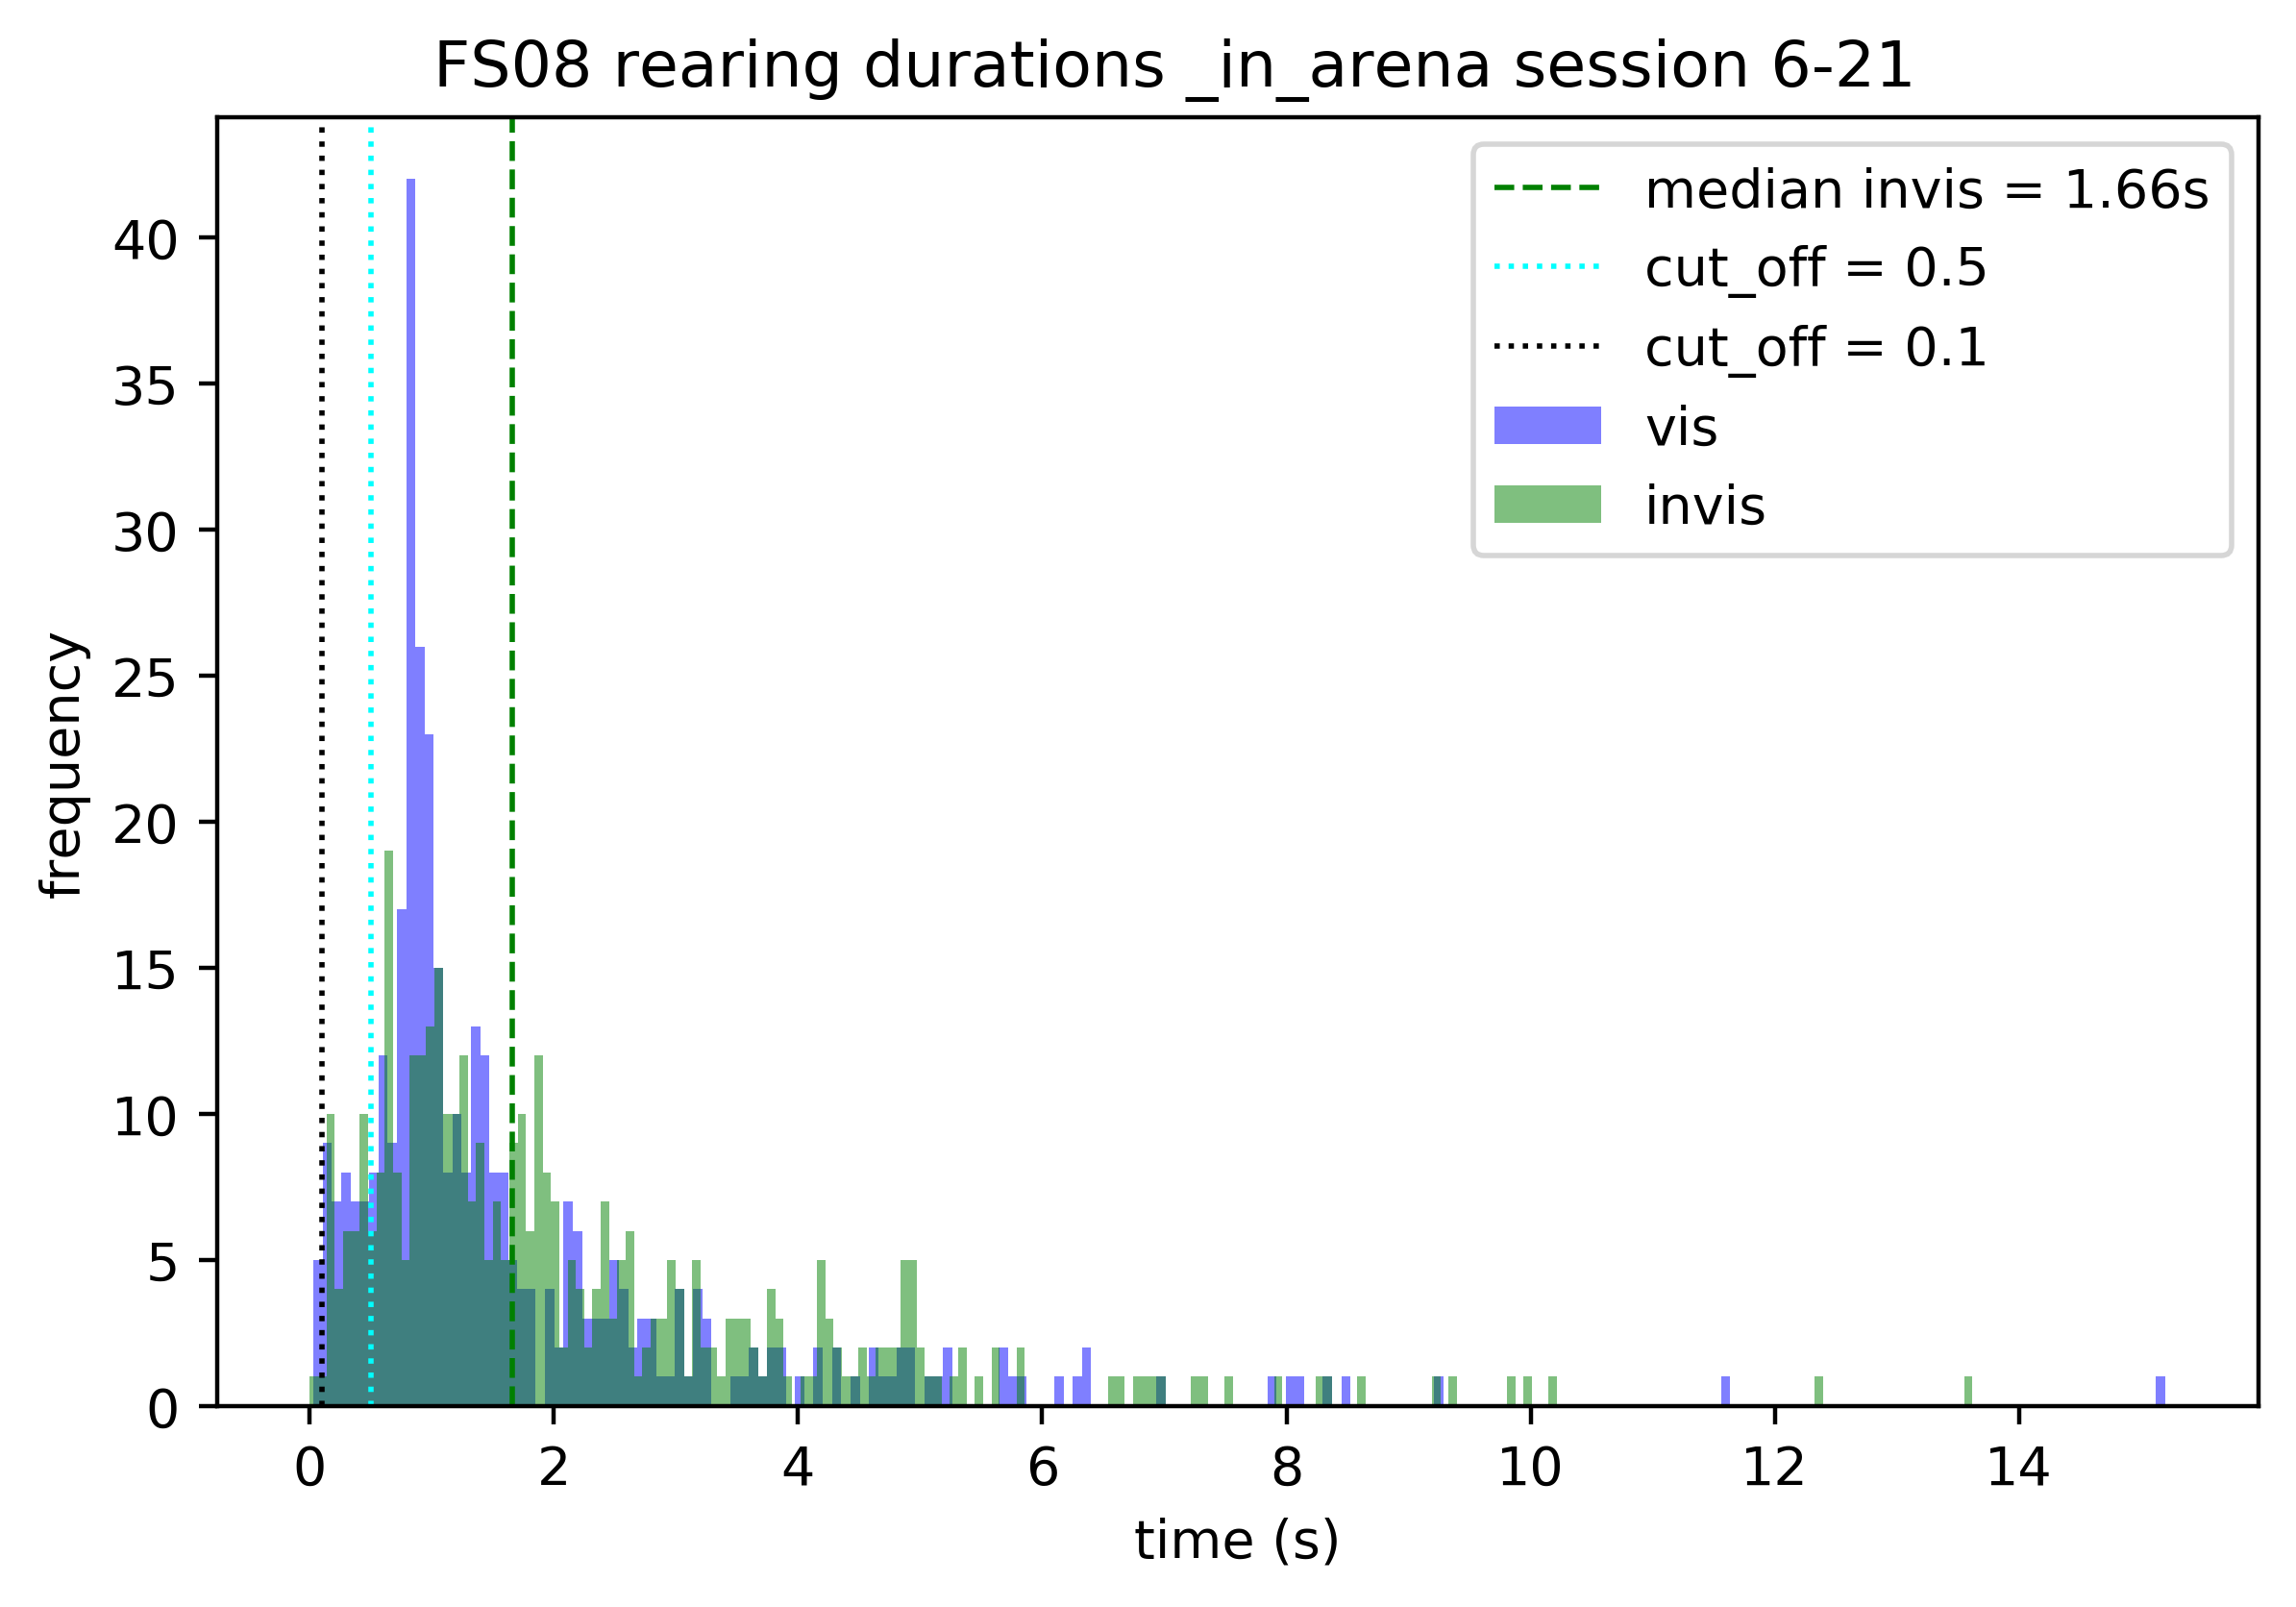

In [48]:
rat_ID='FS08'
day_beg=6
day_end=21
def make_simple_graphs_visibility (animal_ID,lenght,lenght_out,day_beg,day_end,In_arena=True):
    if In_arena:
        border= '_in_arena'
    else:
        border=''
    plt.tight_layout
    median = statistics.median(lenght_in)
    fig, ax = plt.subplots(1,dpi=400,sharex=False)
    fig.suptitle(animal_ID +' rearing durations %s session %s-%s '%(border,day_beg,day_end),y=1)
    N, bins, patches=ax.hist(lenght_out,bins = 200,alpha=.5,color='blue',label = "vis")
    N, bins, patches=ax.hist(lenght,bins = 200,alpha=.5,color='g',label = "invis")
    #ax.set_title('rear duration')
    fig.tight_layout(pad=1.5)
    plt.axvline(x=median , color='g', linestyle='dashed', linewidth=1,label ="median invis = %.2fs"%median)
    plt.axvline(x=.5 , color='cyan', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.5)
    plt.axvline(x=.1 , color='black', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.1)
    plt.xlabel('time (s)')
    plt.ylabel('frequency')
    ax.legend(loc='upper right')
    plt.savefig('%srat_rearing_duration_visibility%s_session_%s_%s_%s.png'%(figures,border,day_beg,day_end,animal_ID), dpi = 100)
    
make_simple_graphs_visibility(rat_ID ,lenght_in,lenght_out,day_beg,day_end,In_arena=True) 

### PLOT Invisible rears which are close to the beacon and all else. 

In [56]:
#FS08=pd.read_excel(processed +'FS08_rears_all.xlsx', index_col=0)

def Get_rear_dur_visible_beacon_and_not (rat_ID,day_beg,day_end,distance_from_beacon=.2):
    with h5py.File(processed+'/'+ rat_ID +'/' +rat_ID +'.h5', 'r')  as rat:
        Friday = rear_analysis.day_cutter(rat_ID,In_arena=False, days=(day_beg,day_end))
        meta_rears = Friday.reset_index()
        days= (list(rat.keys()))
        select_days= days[day_beg:day_end]
        keys = allkeys(rat)
        index=0
        rear_traj=[]
        rear_traj_out=[]
        lenght_in=[]
        lenght_out=[]
        for key in keys: 
            for day in select_days:
                if day in key:
                     if len(key)>17:
                        rear = rat.get(key)
                        rear=pd.DataFrame(rear)
                        time= rear.iloc[0][0]
                        k =meta_rears[meta_rears['Time'].apply(lambda x: x==time)]
                        dist = distance(k.iloc[0][2],k.iloc[0][3],k.iloc[0][5],k.iloc[0][6])
                        #print(dist)
                        #print(k.iloc[0][7])
                        if k.iloc[0][7]==0 and dist <distance_from_beacon:
                            index+=1
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut) :
                                rear_traj.append(positions[2])
                                #plt.plot(positions[2])
                                lenght_in.append((positions[0].iloc[-1]-positions[0][0]))

                        else:
                            positions=rear_analysis.rotation_correction_points(rear,alpha =1.7)
                            if (X_cut_min + cut) < positions[1][count] < (X_cut_max - cut) and (Y_cut_min + cut) < positions[3][
                            count] < (Y_cut_max - cut):
                                rear_traj_out.append(positions[2])
                                lenght_out.append((positions[0].iloc[-1]-positions[0][0]))

        print("collected %s rears"%index)
    return(lenght_in,lenght_out,rear_traj,rear_traj_out)
lenght_in,lenght_out,rear_traj,rear_traj_out=Get_rear_dur_visible_beacon_and_not(rat_ID='FS10',day_beg=8,day_end=15,distance_from_beacon=.2)

collected 241 rears


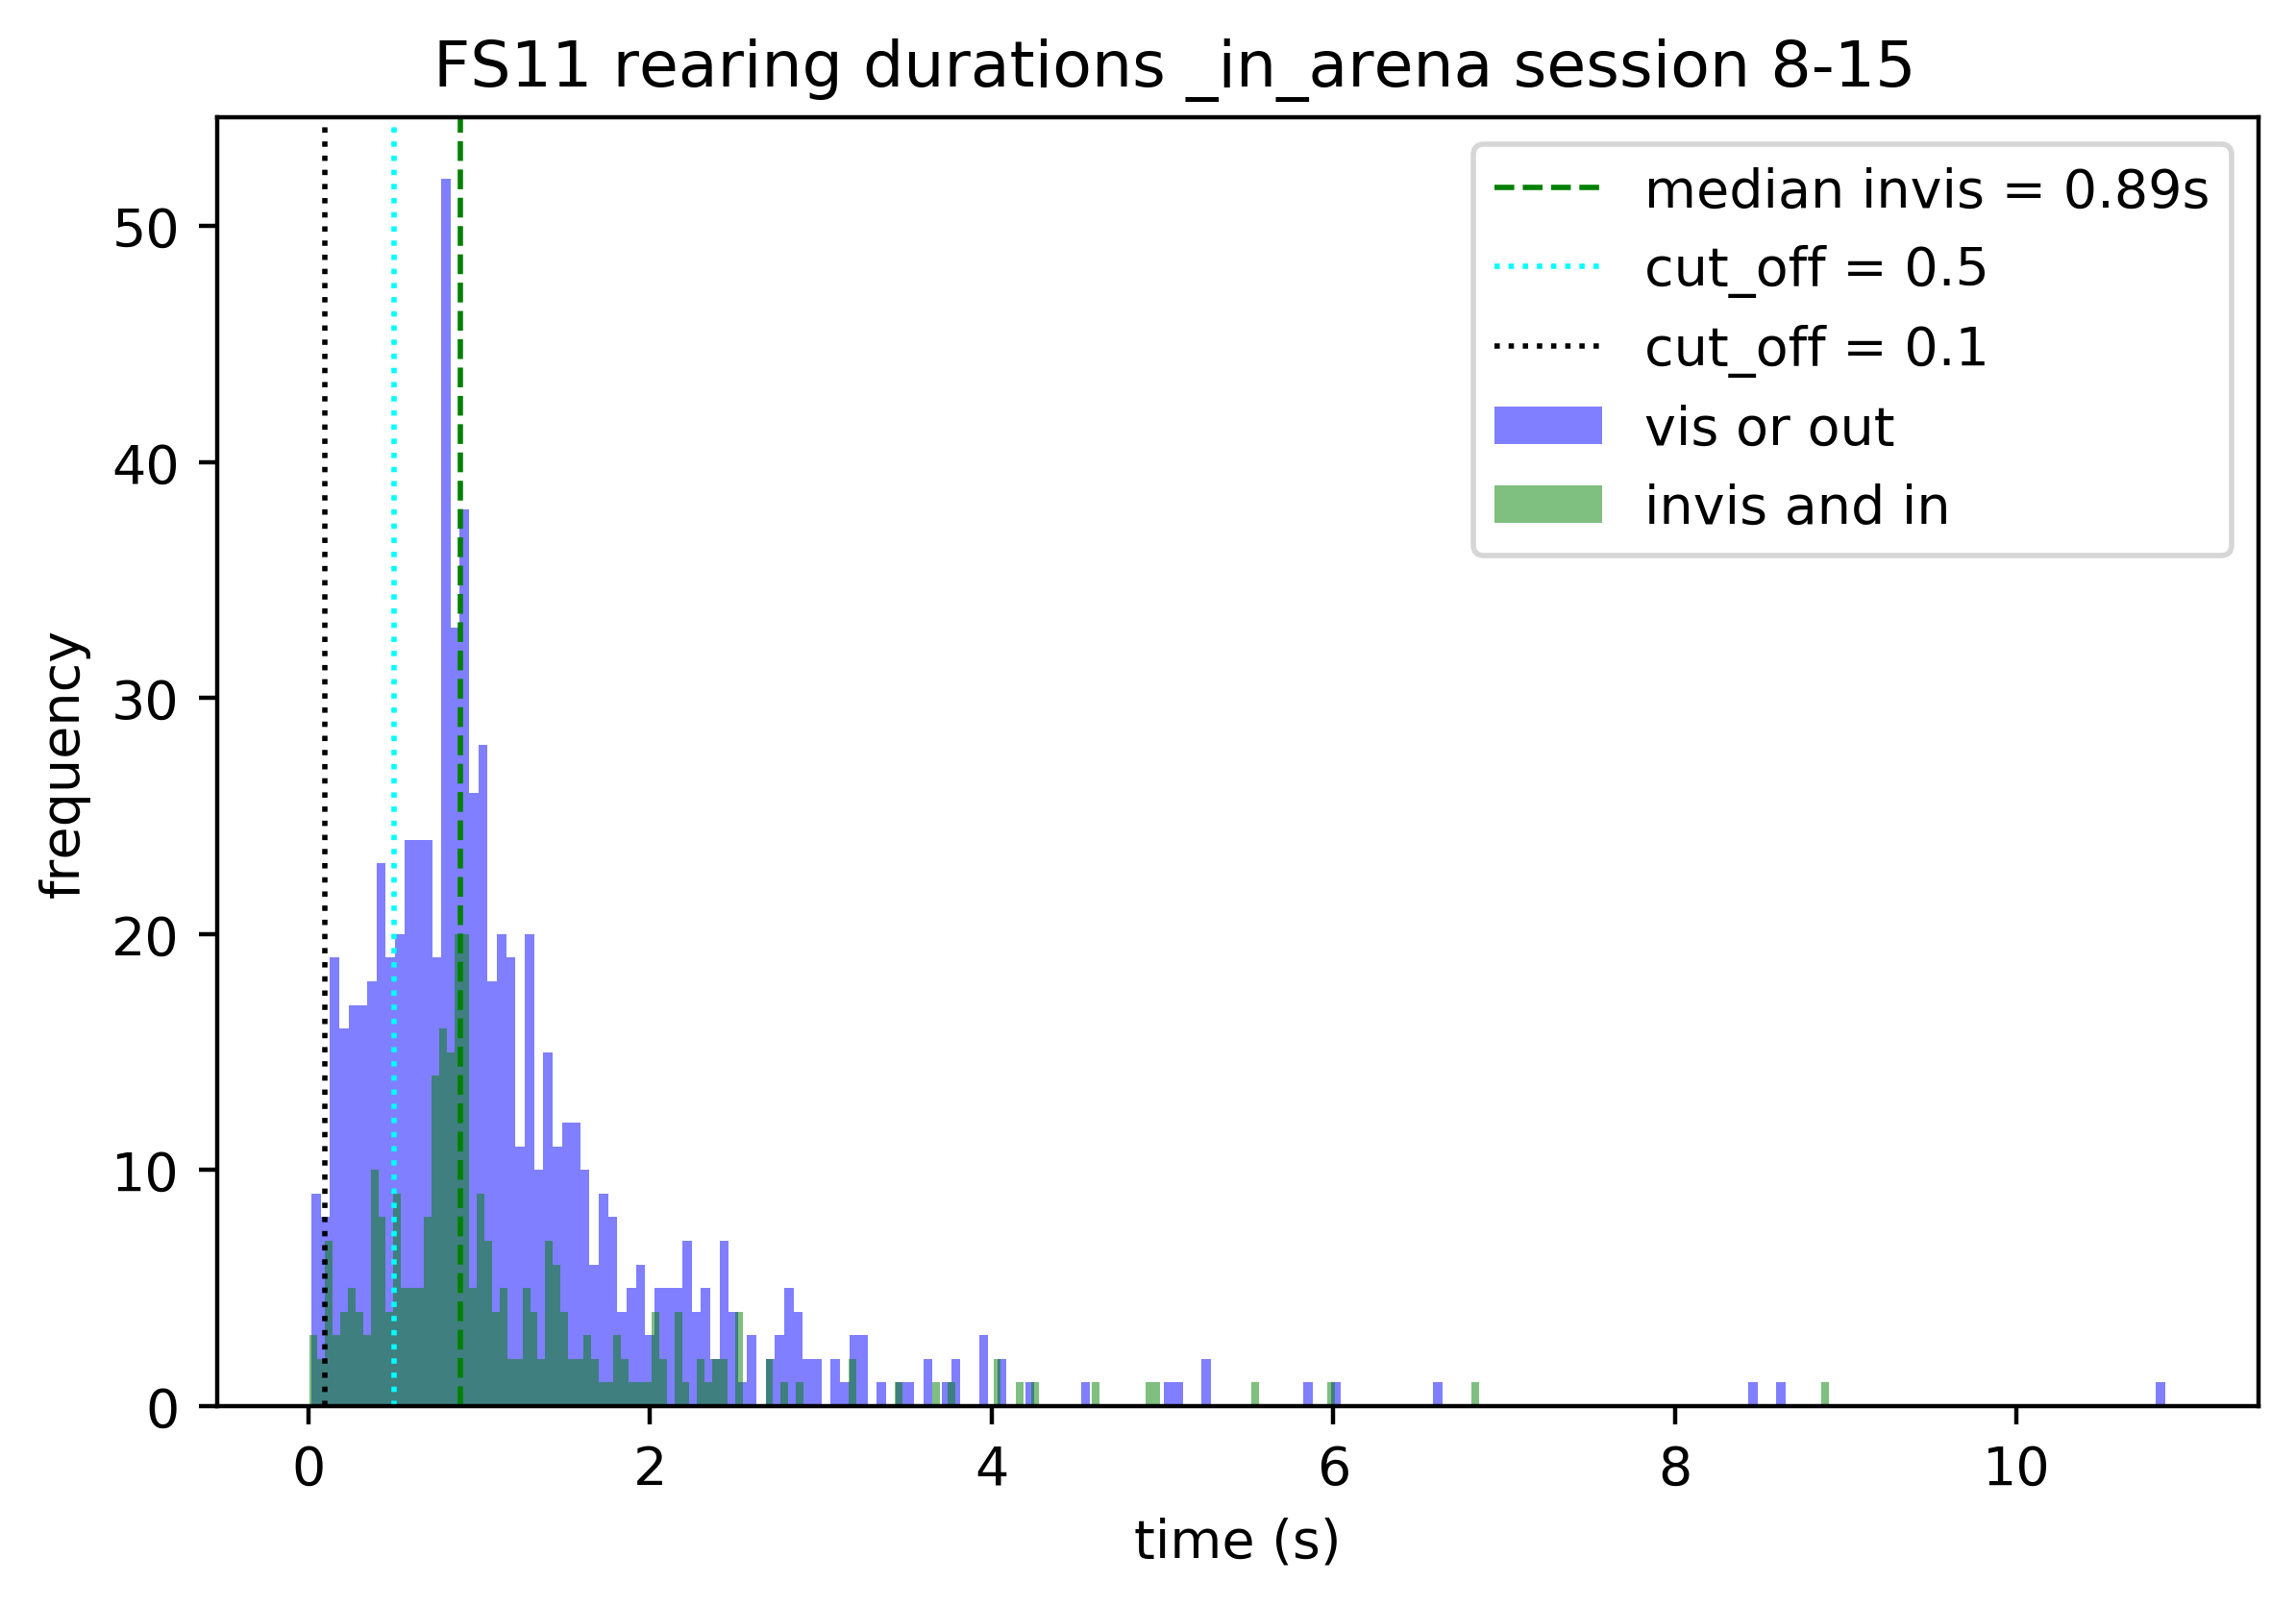

In [50]:
rat_ID='FS11'
day_beg=8
day_end=15
def make_simple_graphs_visibility_beacon (animal_ID,lenght,lenght_out,day_beg,day_end,In_arena=True):
    if In_arena:
        border= '_in_arena'
    else:
        border=''
    plt.tight_layout
    median = statistics.median(lenght_in)
    fig, ax = plt.subplots(1,dpi=400,sharex=False)
    fig.suptitle(animal_ID +' rearing durations %s session %s-%s '%(border,day_beg,day_end),y=1)
    N, bins, patches=ax.hist(lenght_out,bins = 200,alpha=.5,color='blue',label = "vis or out")
    N, bins, patches=ax.hist(lenght,bins = 200,alpha=.5,color='g',label = "invis and in ")
    #ax.set_title('rear duration')
    fig.tight_layout(pad=1.5)
    plt.axvline(x=median , color='g', linestyle='dashed', linewidth=1,label ="median invis = %.2fs"%median)
    plt.axvline(x=.5 , color='cyan', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.5)
    plt.axvline(x=.1 , color='black', linestyle='dotted', linewidth=1,label ="cut_off = %.1f"%.1)
    plt.xlabel('time (s)')
    plt.ylabel('frequency')
    ax.legend(loc='upper right')
    plt.savefig('%srat_rearing_duration_visibility_beacon%s_session_%s_%s_%s.png'%(figures,border,day_beg,day_end,animal_ID), dpi = 100)
    
make_simple_graphs_visibility_beacon(rat_ID ,lenght_in,lenght_out,day_beg,day_end,In_arena=True) 

### To plot trajectories 

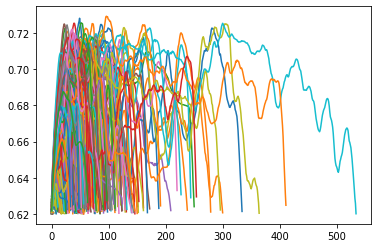

In [51]:
for rear in rear_traj:
    plt.plot(rear)

## Animated plotting 

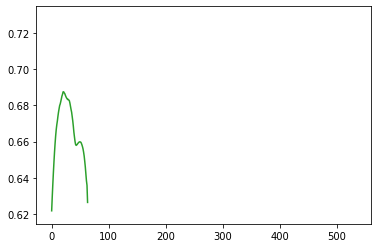

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML


fig = plt.figure()
camera = Camera(fig)
#fig.suptitle('%s seconds in session %s showing %s beacons animated '% (seconds_back, session,len(index)), fontsize=10)
for rear in rear_traj:
    plt.plot(rear)
    camera.snap()
animation = camera.animate(blit=True, interval=500 ,repeat = True,
                           repeat_delay = 500)#number in msec
HTML(animation.to_html5_video())
animation.save('%sRat_rear_trajetory_around_beacon_FS11_mid.gif' %figures, writer = 'pillow')


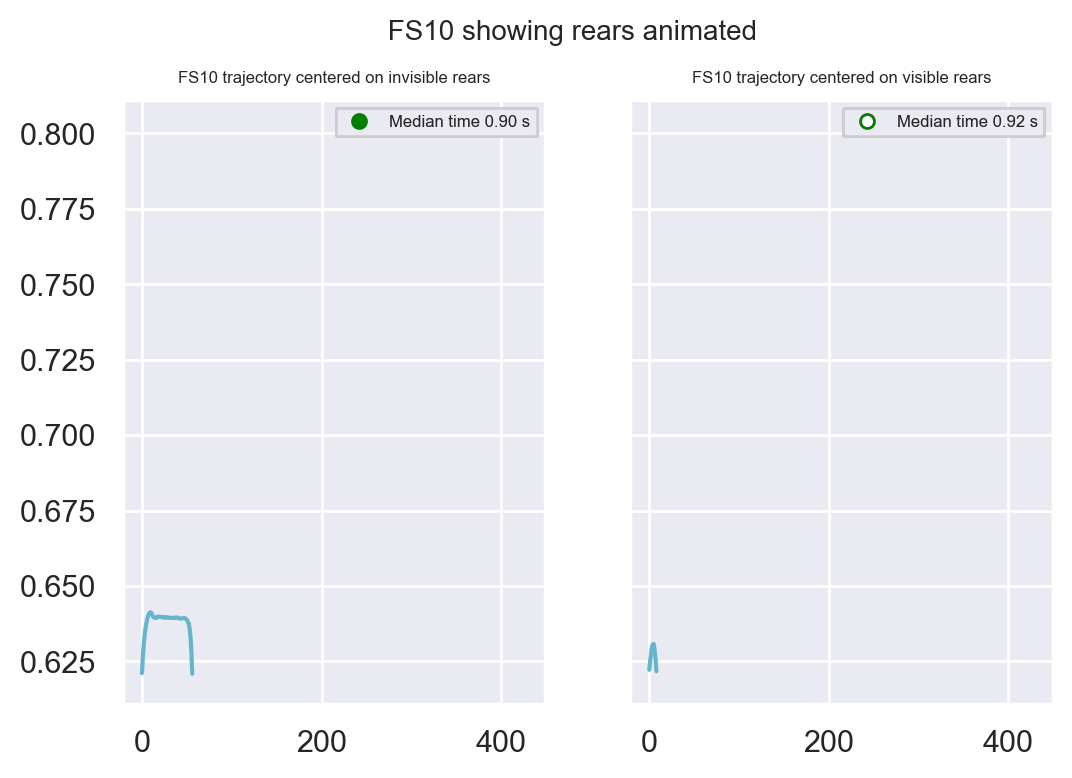

In [58]:
sns.set()
def Rear_trajectories_animated (session,lenght_in,lenght_out,rear_traj,rear_traj_out,): 
    """function plots rear trajectory   """
    

    
    fig, ax = plt.subplots(1,2,dpi=200,sharey=True,sharex=True)
    camera = Camera(fig)

        
    ax[0].set_title ('%s trajectory centered on invisible rears'%(session), fontsize=6) 
    ax[1].set_title ('%s trajectory centered on visible rears'%(session),fontsize=6)
    
    median = statistics.median(lenght_in)
    median_out= statistics.median(lenght_out)
    
    median = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="green",
                            markeredgecolor="green",linewidth = 0, label='Median time %.2f s' %median)
    median_out = mlines.Line2D([], [], marker='o',markersize=5,markerfacecolor="white",
                            markeredgecolor="green",linewidth = 0, label='Median time %.2f s' %median_out)
        
    ax[0].legend(handles=[median],loc='best',prop={'size': 6})
    ax[1].legend(handles=[median_out],loc='best',prop={'size': 6})
    
    fig.suptitle(' %s showing rears animated '% ( session,), fontsize=10)
    
    for index in range(0,80,2):
        ax[0].plot(rear_traj[index])
        ax[1].plot(rear_traj_out[index])
        camera.snap()
    animation = camera.animate(blit=False, interval=500 ,repeat = True,
                           repeat_delay = 500)#number in msec
    HTML(animation.to_html5_video())
    animation.save('%sRat_rear_trajetory_around_beacon_%s_mid_both.gif' %(figures,session), writer = 'pillow')

Rear_trajectories_animated ('FS10',lenght_in,lenght_out,rear_traj,rear_traj_out)

### Extension - beacon group tiredenss - NOT NOW   or beacon group precision. or shape if touching walls  or not
TODO : Can also count displacement in X/Y to see the radius of a usual rear - then can calcualte likelihood of actually gettign in the center. if they move whichever way. 

# GRAVEYARD